# Bibliotecas

In [17]:
#Bibliotecas
from shapely import LineString, Point, Polygon
import shapely as sh
import matplotlib.pyplot as plt
from random import uniform
import numpy as np

# Funciones

In [18]:
#Funciones

def distancia_de_un_punto_a_otros(zz,punto):
    """
    zz    -> Arreglo numpy de dimensiones(N,2)
    punto -> coordenadas de un punto (x,y)
    """
    
    z= np.array(zz,copy=True)
    #Ahora encontraremos la distancia minima
    distancia_minima = 1000

    for i in range(0,len(zz)):
        
            #Calculamos la distancia entre el punto i y el punto j
            distancia =   Point(z[i,0],z[i,1]).distance(Point(punto[0],punto[1]))
            
            #Si la distancia calculada es menor a la distancia minima entonces la actualizamos y si 
            #es la primera comparacion esa es la distancia minima
            if distancia_minima>distancia:
                distancia_minima = distancia

    return distancia_minima

#Funciones
def distancia_de_un_punto_a_otros_identificador(zz,punto):
    """
    zz    -> Arreglo numpy de dimensiones(N,2)
    punto -> coordenadas de un punto (x,y)
    
    Se regresan dos resultados
    distancia_minima -> Float64
    indice -> Indice de cual fue el elemento del arreglo zz
              con el que se encontro la distancia minima
    """
    
    z= np.array(zz,copy=True)
    #Ahora encontraremos la distancia minima
    distancia_minima = 1000
    indice = 0
    for i in range(0,len(zz)):
        
            #Calculamos la distancia entre el punto i y el punto j
            distancia =   Point(z[i,0],z[i,1]).distance(Point(punto[0],punto[1]))
            
            #Si la distancia calculada es menor a la distancia minima entonces la actualizamos y si 
            #es la primera comparacion esa es la distancia minima
            if distancia_minima>distancia:
                distancia_minima = distancia
                indice = i

    return distancia_minima, indice


def distancia_minima_todos_puntos(zz,indice_max):
    z= np.array(zz,copy=True)
    #Ahora encontraremos la distancia minima
    distancia_minima = 1000

    for i in range(0,indice_max):
        for j in range(0,indice_max):
            #No se compara la distancia entre puntos iguales
            if i==j:
                break
            #Calculamos la distancia entre el punto i y el punto j
            #distancia = ((z[i,0] - z[j,0])**2 + (z[i,1] - z[j,1])**2)**0.5
            distancia =   Point(z[i,0],z[i,1]).distance(Point(z[j,0],z[j,1]))
            #Si la distancia calculada es menor a la distancia minima entonces la actualizamos y si 
            #es la primera comparacion esa es la distancia minima
            if distancia_minima>distancia and (distancia != 0):
                distancia_minima = distancia

    return distancia_minima

def identificador_cero(zz):
    z= np.array(zz,copy=True)
    for i in range(0,len(z)):
        if (z[i,0] == 0) and (z[i,1]==0):
            break
    
    return i

#Esta funcion genera las rectas para graficar no para saber que valores tiene esa recta
def f(x,a,b):
    y=0
    xx = np.array(x,copy=True)
    y = a*xx + b
    return y

#Esta funcion tiene como objetivo calcular las pendientes de multiples rectas 
#en las que cada una pasa sobre dos puntos
def calcular_las_semirectas(arreglo):
    """
    El arreglo que se recibe debe de tener el siguiente formato 
    arreglo :   Dimensiones ->  (ranglones  ,  filas)
                                (N_renglones,2_filas)
                Valores_recibidos ->  [[coord_x, coord_y), (coord_x1,coord_y1),...]
    Se regresará un arreglo con el siguiente formato
    m       :   Dimensiones ->  (ranglones         ,filas)
                                (cantidad_de_Rectas,    6)
                Valores_en_cada_renglon ->   (pendiente, ordenada_origen,
                                                limitex_inferior, limitex_superior
                                                limitey_inferior, limitey_superior)
                
    """
    arreglo_u = np.array(arreglo, copy=True)
    
    #La cantidad de rectas que se van a calcular depende de la cantidad de puntos
    if len(arreglo_u) == 2:
        cantidad_de_rectas = 1
    else:
        cantidad_de_rectas = len(arreglo_u) - 1

        
    rectas = np.zeros((cantidad_de_rectas,6),np.float64)
    
    #Se calcularan las normales 
    for i in range(0,len(rectas)):
        #Hacemos un filtro para comprobar que los puntos 
        #no puedan estar uno sobre otro y no obtendremos un error matematico
        #o un valor gigantesco
        
        #rectas[,0] = np.nan significa que hay infinitos valores y
        #rectas[,0] = np.inf es que hay infinitos valores de x      
        #Caso en el que hay infinitos valores de y para una funcion
        if abs(arreglo_u[i,0] - arreglo_u[i+1,0])<0.000001:
            rectas[i,:] = (np.nan,np.inf,arreglo[i,0],arreglo[i+1,0],arreglo[i,1],arreglo[i+1,1])
            

            continue
        #Caso en el que hay infinitos valores x para una funcion
        elif abs(arreglo_u[i,1] - arreglo_u[i+1,1])<0.000001:
            rectas[i,:] = (np.inf,np.nan,arreglo[i,0],arreglo[i+1,0],arreglo[i,1],arreglo[i+1,1])
            continue
            
        #Caso regular
        else:
            p = np.polyfit(
                        arreglo_u[i:i+2,0],
                        arreglo_u[i:i+2,1],
                        1)
            rectas[i,:] = (p[0],p[1],arreglo[i,0],arreglo[i+1,0],arreglo[i,1],arreglo[i+1,1])
        
    return rectas

def vector_director(m1,b1):
    
    #Calculamos dos puntos de cada recta
    x1=1
    x2=2
    P1 = [x1, f(x1,m1,b1)]
    P2 = [x2, f(x2,m1,b1)]
    vector_dire = [P2[0] - P1[0], P2[1] - P1[1]]
    
    #Normalizamos el vector director
    magnitude = (vector_dire[0]**2 + vector_dire[1]**2)**0.5
     
    
    vector_dire = [vector_dire[0]/magnitude, vector_dire[1]/magnitude]
    if np.isinf(m1):
        vector_dire = [1,0]
    elif np.isnan(m1):
        vector_dire = [0,1]
        
    return np.array(vector_dire)

def pts_vecindad(arr,pt_c,h):
    """
    Objetivo: El objetivo de la funcion es encontrar todos los puntos (x,y) que se encuentran dentro de 
    una vecindad circular con cierto radio R y regresar los indices correspondientes 
    
    Datos de entrada:
        arr:
            Arreglo tipo numpy
            Dimensiones   ->    (renglones,columnas)
                                (        N,       2)
                                N es un numero entero deseado
        pt_c:
            Arreglo tipo numpy o lista, preferiblemente un arreglo
            Dimensiones   ->    (renglones,columnas)
                                (        1,       2)
        h:
            Variable tipo flotante
    Datos de salida:
        indices_arr:
            Arreglo tipo numpy con tipo de dato np.float64
            Dimensiones   ->    (renglones,columnas)
                                (        M,       1)
                                M es la canatidad de indices que la funcion encuentre
                                dentro de la vecindad
    nota: Se espera que una futura implementación permita tambien reducir la cantidad de calculos
          tomando encuenta que un pt1 ya se encuentra en la vecindad de otro pt2, por lo que pt2
          es parte de la vecindad de pt1
          
    """
    arr_u = np.array(arr,copy=True)
    N = len(arr_u)
    
    indices_arr = np.zeros((N,1),np.float64)
    
    #Cuenta cuantos pts caen dentro de la vecindad
    cont_in_h = 0
    
    
    for i in range(0,N):
        
        #Observamos que no haya dos puntos iguales mas de dos veces, por que si hay dos puntos iguales
        #mas de dos veces tenemos un error en nuestro filtrado de puntos en el poligono
        
        
        #Observamos si la distancia entre los puntos pt_c, y arr_u[i] es menor que
        #el radio de la vecindad y 
        distance = Point(pt_c[0],pt_c[1]).distance(Point(arr_u[i,0],arr_u[i,1]))
        if (h > distance) and (distance!=0.0):
            #Si es menor entonces guardamos el indice y aumentamos el contador
            indices_arr[i,0] = i
            cont_in_h +=1
        elif distance==0.0:
            print("Cuidao")
            
    #Regresamos un indice con esos datos
    return indices_arr

# Figura

Lo que buscamos aquí es ordenar los puntos de la siguiente forma:

    - Dar un arreglo
    - Generar un arreglo vacio de las mismas dimensiones
    - Elegir un elemento de ese arreglo
    - Guardar ese elemento en la primera parte del arreglo en ceros
    - Calcular cual es el siguiente punto más cercano a ese
    - Guardar ese punto en el siguiente indice del arreglo en ceros
    - Eliminar el punto del arreglo original

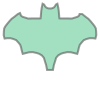

In [19]:
Puntos_sin_ordenar = [(0.398800723842904, -7.95365259525281), (3.68659254979499, -5.78561595640035), (0.517923616087545, -7.31038897713175), (0.684695665230042, -6.78624825125533), (0.827643135923611, -6.30975668227677), (1.11353807731075, -5.97621258399178), (1.49473133249360, -5.76179137795142), (1.87592458767645, -5.64266848570678), (2.35241615665501, -5.54737017191107), (2.85273230408251, -5.57119475036000), (3.23392555926536, -5.66649306415571), (3.80571544203963, -5.38059812276857), (3.90101375583535, -4.95175571068787), (4.02013664807999, -4.57056245550502), (4.28220701101820, -4.23701835722002), (4.56810195240534, -3.92729883738396), (4.90164605069033, -3.78435136669039), (5.33048846277104, -3.66522847444575), (5.78315545330067, -3.66522847444575), (6.14052413003459, -3.71287763134360), (6.25964702227924, -3.26021064081397), (6.23582244383031, -2.68842075803969), (6.18817328693245, -2.33105208130577), (6.00000000000000, -2.00000000000000), (5.71168171795389, -1.64013930628686), (5.47343593346461, -1.35424436489972), (5.18754099207747, -1.04452484506365), (4.83017231534355, -0.782454482125443), (4.35368074636498, -0.401261226942592), (4.05994439664004, -0.188418145184806), (3.99831611752934, -0.393845742220471), (3.94695921827042, -0.578730579552571), (3.81343128019724, -0.712258517625753), (3.66963196227227, -0.784158176588236), (3.42311884582947, -0.866329215402503), (3.22796262864559, -0.917686114661419), (3.00000000000000, -1.00000000000000), (2.76575053531534, -1.01012853332747), (2.53978017857610, -0.999857153475685), (2.28299568228152, -0.999857153475685), (2.00000000000000, -1.00000000000000), (1.70779841058166, -0.999857153475685), (1.46128529413886, -0.999857153475685), (1.27640045680676, -0.979314393772119), (1.24558631725141, -0.763615416884670), (1.23531493739962, -0.558187819849004), (1.20450079784427, -0.280860563850855), (1.18395803814071, 0.00000000000000), (1.15314389858536, 0.201894289182960), (1.13260113888179, 0.386779126515059), (1.09151561947466, 0.592206723550725), (1.04015872021574, 0.818177080289957), (1.00000000000000, 1.00000000000000), (0.845002503031856, 0.920890878807790), (0.742288704514023, 0.797634320586390), (0.660117665699756, 0.633292242957858), (0.516318347774790, 0.489492925032892), (0.351976270146257, 0.407321886218625), (0.177362812665940, 0.355964986959709), (-0.398800723842905, -7.95365259525281), (-3.68659254979499, -5.78561595640035), (-0.517923616087546, -7.31038897713175), (-0.684695665230043, -6.78624825125533), (-0.827643135923612, -6.30975668227677), (-1.11353807731075, -5.97621258399178), (-1.49473133249360, -5.76179137795142), (-1.87592458767645, -5.64266848570678), (-2.35241615665502, -5.54737017191107), (-2.85273230408251, -5.57119475036000), (-3.23392555926536, -5.66649306415571), (-3.80571544203963, -5.38059812276857), (-3.90101375583535, -4.95175571068787), (-4.02013664807999, -4.57056245550502), (-4.28220701101820, -4.23701835722002), (-4.56810195240534, -3.92729883738396), (-4.90164605069033, -3.78435136669039), (-5.33048846277104, -3.66522847444575), (-5.78315545330067, -3.66522847444575), (-6.14052413003460, -3.71287763134360), (-6.25964702227924, -3.26021064081397), (-6.23582244383031, -2.68842075803969), (-6.18817328693245, -2.33105208130577), (-6.00000000000000, -2.00000000000000), (-5.71168171795389, -1.64013930628685), (-5.47343593346461, -1.35424436489972), (-5.18754099207747, -1.04452484506365), (-4.83017231534355, -0.782454482125442), (-4.35368074636498, -0.401261226942592), (-4.05994439664004, -0.258418145184805), (-3.99831611752934, -0.393845742220471), (-3.94695921827042, -0.578730579552570), (-3.81343128019724, -0.712258517625753), (-3.66963196227227, -0.784158176588236), (-3.42311884582947, -0.866329215402502), (-3.22796262864559, -0.917686114661419), (-3.00000000000000, -1.00000000000000), (-2.76575053531534, -1.01012853332747), (-2.53978017857610, -0.999857153475685), (-2.28299568228152, -0.999857153475685), (-2.00000000000000, -1.00000000000000), (-1.70779841058166, -0.999857153475685), (-1.46128529413886, -0.999857153475685), (-1.27640045680676, -0.979314393772119), (-1.24558631725141, -0.763615416884670), (-1.23531493739962, -0.558187819849004), (-1.20450079784427, -0.280860563850855), (-1.18395803814071, 1.44993042173379E-16), (-1.15314389858536, 0.201894289182960), (-1.13260113888179, 0.386779126515059), (-1.09151561947466, 0.592206723550725), (-1.04015872021574, 0.818177080289957), (-1.00000000000000, 1.00000000000000), (-0.845002503031856, 0.920890878807790), (-0.742288704514023, 0.797634320586391), (-0.660117665699756, 0.633292242957858), (-0.516318347774790, 0.489492925032892), (-0.351976270146256, 0.407321886218625), (-0.177362812665940, 0.355964986959709)]
 
Puntos_sin_ordenar = np.array(Puntos_sin_ordenar)
Puntos_ordenados = np.zeros((len(Puntos_sin_ordenar),len(Puntos_sin_ordenar[0,:])), np.float64)

#Elemento inicial 
ele = 0
Puntos_ordenados[0,:] = Puntos_sin_ordenar[ele,:]

#Aqui se guardará el indice de con que otro punto se consiguio la distancia minima
identificador = 0
#distancia_minima
for i in range(0,len(Puntos_sin_ordenar)-1):

        distancia_minima,identificador = distancia_de_un_punto_a_otros_identificador(Puntos_sin_ordenar,Puntos_ordenados[i,:])
        
        Puntos_ordenados[i+1,:] = Puntos_sin_ordenar[identificador,:]

        Puntos_sin_ordenar = np.delete(Puntos_sin_ordenar,(identificador),axis=0)

poly = Polygon(Puntos_ordenados)
Figura = Puntos_ordenados
poly

# Estructuras de datos

In [20]:
#Numero de puntos iniciales
N = len(Figura)

#Numero de contornos
cant_de_contornos = 1

#Requerimos un aproximado de los puntos totales que queremos en la figura
repeticion = 10
N_aprox = N + N*repeticion


In [21]:
contornos_tipo = np.dtype([
        ('pt_f_c',np.float64,(N_aprox,2)),
        ('Color','S15',(N_aprox,)),
        ('Contorno',np.int64)
])

"""
Así genero un arreglo con este tipo de estructura de datos
"""
#contornos = np.zeros((cant_de_contornos),dtype=contornos_tipo)
#contornos[0]['Color'][0] = 's'

'\nAsí genero un arreglo con este tipo de estructura de datos\n'

# Programa general

In [22]:
#Aquí guardaremos la coordenada (x,y) del punto aleatorio generado
pt_ale = [0,0]

#Arreglo en donde estaran todos estos puntos con sus caracteristicas
#Puntos generales
pts_g = np.zeros((cant_de_contornos),dtype=contornos_tipo)

#Como acceder a un punto de la estructura de datos
#pts_g[0]['pt_f_c'][0,:]

#Arreglo para animar
pt_f_c_x_animation = np.zeros((N_aprox,N_aprox),np.float64)
pt_f_c_y_animation = np.zeros((N_aprox,N_aprox),np.float64)

#Variable para la distancia minima entre puntos
distancia_minima = 1000

#Guardamos los puntos de la figura en el arreglo
pts_g[0]['pt_f_c'][:len(Figura),:] = Figura[:,:]

#Calcularemos las pendientes de todo
rectas = calcular_las_semirectas(pts_g[0]['pt_f_c'][:N])

#Ahora que ya calculamos las rectas para todos los puntos
#toca encontrar la recta normal a cada una de ellas
rectas_normales = np.array(rectas,copy=True)
for i in range(0,len(rectas)):
    #rectas[,0] = np.nan significa que hay infinitos valores y
    #Rectas[,0] = np.inf es que hay infinitos valores de x    
    
    #Condicion 
    #Si una recta tiene inf valores de Y, entonces la normal
    #tiene inf valores de X para una sola Y
    if np.isnan(rectas[i,0])==True:
        rectas_normales[i,0] = np.inf
        rectas_normales[i,1] = np.nan

    elif np.isinf(rectas[i,0])==True:
        rectas_normales[i,0] = np.nan
        rectas_normales[i,1] = np.inf

    else:
        rectas_normales[i,0] = -1*(1/rectas[i,0])


#Ahora pasara por el punto deseado en teoria
nueva_b = np.zeros((len(rectas),1),np.float64)
nueva_b_derechos = np.zeros((len(rectas),1),np.float64)

#y Ahora calculamos los vectores normales de cada recta normal
#Aqui guardamos los vectores normales
vec_normal = np.zeros((len(rectas),2),np.float64)

for i in range(0,len(rectas)):
    #CALCULAMOS nueva B para que las rectas pasen por los puntos izquierdos
    nueva_b[i] = (rectas[i,3] - rectas_normales[i,0]*rectas[i,2]) 
    
    #Calculamos nuevos vectores normales promedio
    vec_normal[i,:] = vector_director(rectas_normales[i,0],rectas_normales[i,1])

    


#Calculamos la distancia minima entre todos los puntos
distancia_minima = distancia_minima_todos_puntos(pts_g[0]['pt_f_c'][:N,:],N) 

#Definimos los radios interior y exterior
r_interior = distancia_minima*0.8
r_exterior = 10*r_interior

#Nos permite saber que tanto mover indices segun puntos aleatorios generados
cant_pt_cumplidos =0

#Contador de nuevos puntos
i=int(0)

#Contador para saber si ya fueron muchos intentos
intentos_limites = 100
contador_intentos = 0

#Contador de nuevos calculos completos
cont_completos=1


#Este for generara puntos hasta llegar a la iteracion que
#buscamos
while i<(N_aprox-N):
    #print(i)
    
    #Esta parte identificara si hay todavia elementos iguales a cero y permitira
    #calcular nuevos elementos
    if i>identificador_cero(pts_g[0]['pt_f_c']):
        i = identificador_cero(pts_g[0]['pt_f_c']) - 5*cont_completos
        if i<N or cont_completos==8:
            i = 0
        print(cont_completos)
        cont_completos +=1
    if cont_completos>20:
        break
    while True:
            #Se genera un punto aleatorio alrededor del punto que
            #que buscamos en una cuadratura
            pt_ale[0] = (r_exterior*uniform(-1,1) + pts_g[0]['pt_f_c'][i,0])
            pt_ale[1] = (r_exterior*uniform(-1,1) + pts_g[0]['pt_f_c'][i,1])
            
            #Calculamos la distancia de este punto con los otros
            distancia_minima_ale_otros =  distancia_de_un_punto_a_otros(pts_g[0]['pt_f_c'][:N+cant_pt_cumplidos,:],pt_ale)
           # print("distancia_minima_ale_otros:", distancia_minima_ale_otros)
            #Si el punto esta entre las circunferencias que buscamos
            #que este lo mantenemos
            if (
                #Condicion si esta fuera del radio interior
            (((pt_ale[0] - pts_g[0]['pt_f_c'][i,0])**2+(pt_ale[1]- pts_g[0]['pt_f_c'][i,1])**2) > r_interior**2)
                #Condicion si esta dentro del radio exterior
                and (((pt_ale[0] - pts_g[0]['pt_f_c'][i,0])**2+(pt_ale[1]- pts_g[0]['pt_f_c'][i,1])**2) < r_exterior**2)
                
                #Condicion si el punto esta dentro de la geometria deseada en Figura        
                and (sh.contains(poly,Point(pt_ale[0],pt_ale[1])))==True
                
                #Si la distancia minima es de pt_ale con los otros es mayor entra
                and distancia_minima_ale_otros>distancia_minima
            ):
                
                #Si cumple con todas esas condiciones guardamos el punto
                pts_g[0]['pt_f_c'][N  +cant_pt_cumplidos,0] = pt_ale[0]
                pts_g[0]['pt_f_c'][N  +cant_pt_cumplidos,1] = pt_ale[1]
                
                pt_f_c_x_animation[:,cant_pt_cumplidos] = pts_g[0]['pt_f_c'][:,0]
                pt_f_c_y_animation[:,cant_pt_cumplidos] = pts_g[0]['pt_f_c'][:,1]
    
                cant_pt_cumplidos += 1
                
                #Reiniciamos los intentos para el nuevo punto generado
                contador_intentos=0
                i+=1
                break
            else:
            #Si no cumple con todas las condiciones repetimos el proceso
            
                #Aumentamos el contador de intentos
                if contador_intentos>intentos_limites:
                    #Aumentamos el contador en uno para la siguiente ocasion
                    i+=1
                    break
                contador_intentos +=1
                continue              


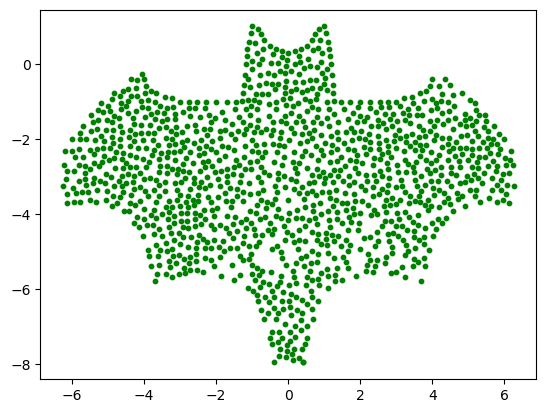

In [23]:
plt.scatter(pts_g[0]['pt_f_c'][:N+cant_pt_cumplidos,0], pts_g[0]['pt_f_c'][:N+cant_pt_cumplidos,1],c="green",s=10)
plt.show()

## Rectas
Muestra de la formación de las rectas

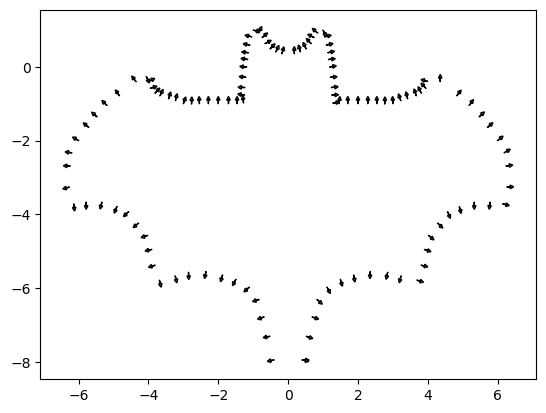

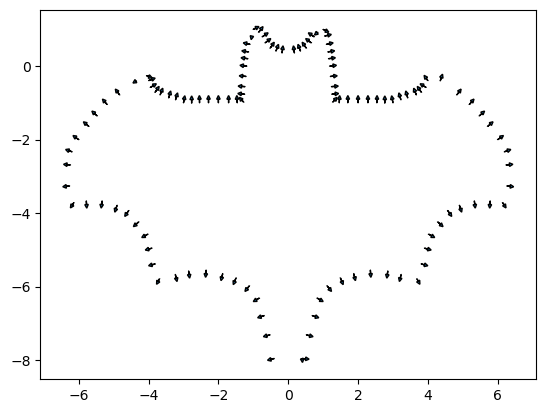

In [24]:
"""
Se calcularán los valores minimos y maximos de los puntos que tiene el poligono
después se procederá a añadirles o restarles un valor con la finalidad
de que se pueda visualizar toda la gráfica
"""
x_min = np.amin( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,0] )
x_max = np.amax( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,0] )
x_max += x_max*0.5
x_min -= x_min*0.5

y_min = np.amin( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,1] )
y_max = np.amax( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,1] )
y_max += y_max*0.5
y_min -= y_min*0.5


#Estos son los vectores directores a las rectas normales, pero no a los puntos
vec_normal_u = np.array(vec_normal,copy=True)
vec_normal_u2 = np.array(vec_normal,copy=True)
vec_normal_u*=0.1
vec_normal_u2*=0.1


#Con esto pasaremos cada uno de los vectores directores hacia afuera de la figura
for pp in range(0,len(rectas_normales)):
    
    #Si el vector normal al hacer crecer la recta termina dentro de la figura, entonces
    #Pasaremos a movernos hacia el otro lado y listo
    x_pr,y_pr = rectas_normales[pp,2] + vec_normal_u[pp,0],rectas_normales[pp,4] + vec_normal_u[pp,1]
    
    if (sh.contains(poly,Point(x_pr,y_pr)))==True:
        vec_normal_u[pp,0] *=-1
        vec_normal_u[pp,1] *=-1
        plt.arrow(rectas_normales[pp,2],rectas_normales[pp,4],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
    else:
        plt.arrow(rectas_normales[pp,2],rectas_normales[pp,4],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
    
    
x_pr,y_pr = rectas_normales[pp,2] + vec_normal_u[pp,0],rectas_normales[pp,4] + vec_normal_u[pp,1]
    

if (sh.contains(poly,Point(x_pr,y_pr)))==True:
    vec_normal_u[pp,0] *=-1
    vec_normal_u[pp,1] *=-1    
    plt.arrow(rectas_normales[pp,3],rectas_normales[pp,5],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
else:
    plt.arrow(rectas_normales[pp,3],rectas_normales[pp,5],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
  

plt.show()








"""
Para calcular los vectores directores normales a los puntos, lo que se hará es:
    1. Sumar los dos vectores normales de las rectas que intersectan en el punto
    2. Se dividiran en dos sus valores y ese será el vector_director ponderado

Para eso usaremos una nueva variable:
    vec_normal_pts que en sus 2 primeros elementos guardara el punto donde inicia
    y en sus ultimos dos elementos guardará el punto en el que termina
"""
vec_normal_pts = np.zeros((N,4),np.float64)

#Esto nos ayudara a encontrar cada vector director para cada punto
#Recordemos que hay una recta menos nada más
for pp in range(0,len(rectas_normales)):
    if pp==0:
        vec_normal_pts[pp,0] = rectas_normales[pp,2]
        vec_normal_pts[pp,1] = rectas_normales[pp,4]
        
        vec_normal_pts[pp,2] = (vec_normal_u[pp,0] + vec_normal_u[len(vec_normal_u)-1,0])/2
        vec_normal_pts[pp,3] = (vec_normal_u[pp,1] + vec_normal_u[len(vec_normal_u)-1,1])/2
        

    elif (pp != 0) :
        vec_normal_pts[pp,0] = rectas_normales[pp,2]
        vec_normal_pts[pp,1] = rectas_normales[pp,4]
        
        vec_normal_pts[pp,2] = (vec_normal_u[pp,0] + vec_normal_u[pp-1,0])/2
        vec_normal_pts[pp,3] = (vec_normal_u[pp,1] + vec_normal_u[pp-1,1])/2
        

vec_normal_pts[pp,0] = rectas_normales[pp,2]
vec_normal_pts[pp,1] = rectas_normales[pp,4]
        
vec_normal_pts[pp,2] = (vec_normal_u[pp-1,0] + vec_normal_u[pp,0])/2
vec_normal_pts[pp,3] = (vec_normal_u[pp-1,1] + vec_normal_u[pp,1])/2
        
vec_normal_pts[N-1,0] = rectas_normales[pp,3]
vec_normal_pts[N-1,1] = rectas_normales[pp,5]
        
vec_normal_pts[N-1,2] = (vec_normal_u[pp-1,0] + vec_normal_u[pp,0])/2
vec_normal_pts[N-1,3] = (vec_normal_u[pp-1,1] + vec_normal_u[pp,1])/2
      

"""
Ahora graficaremos y aparte guardaremos las nuevas direcciones de esas normales
"""
#print(vec_normal_u)
for pp in range(0,len(rectas_normales)+1):
    #Si el vector normal al hacer crecer la recta termina dentro de la figura, entonces
    #Pasaremos a movernos hacia el otro lado y listo
    x_pr, y_pr = vec_normal_pts[pp,0] + vec_normal_pts[pp,2], vec_normal_pts[pp,1] + vec_normal_pts[pp,3]
    
    if (sh.contains(poly,Point(x_pr,y_pr)))==True:
        vec_normal_pts[pp,2] *= -1
        vec_normal_pts[pp,3] *= -1
        plt.arrow(vec_normal_pts[pp,0],vec_normal_pts[pp,1],vec_normal_pts[pp,2],vec_normal_pts[pp,3],head_length = 0.1,head_width=0.1)
    else:
        plt.arrow(vec_normal_pts[pp,0],vec_normal_pts[pp,1],vec_normal_pts[pp,2],vec_normal_pts[pp,3],head_length = 0.1,head_width=0.1)

        
plt.show()   



In [30]:
h = 2
pts_vecindad(
    pts_g[0]['pt_f_c'][:,:],
    pts_g[0]['pt_f_c'][2,:],
    h)



Cuidao


array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])